In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
#pip install xgboost

In [3]:
old_data=pd.read_csv("../input/covid19-mexico-patient-health-dataset/patient.csv")
old_data["death_date"]=old_data["death_date"].replace({"9999-99-99": 1})
old_data.loc[old_data['death_date'] != 1, 'death_date'] = 0

In [4]:
old_data.nunique()

sex                         2
patient_type                2
intubated                   4
pneumonia                   3
age                       104
pregnant                    4
diabetes                    3
copd                        3
asthma                      3
immunosuppression           3
hypertension                3
other_diseases              3
cardiovascular              3
obesity                     3
chronic_kidney_failure      3
smoker                      3
another_case                3
outcome                     3
icu                         4
death_date                  2
dtype: int64

In [5]:
old_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95839 entries, 0 to 95838
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   sex                     95839 non-null  int64 
 1   patient_type            95839 non-null  int64 
 2   intubated               95839 non-null  int64 
 3   pneumonia               95839 non-null  int64 
 4   age                     95839 non-null  int64 
 5   pregnant                95839 non-null  int64 
 6   diabetes                95839 non-null  int64 
 7   copd                    95839 non-null  int64 
 8   asthma                  95839 non-null  int64 
 9   immunosuppression       95839 non-null  int64 
 10  hypertension            95839 non-null  int64 
 11  other_diseases          95839 non-null  int64 
 12  cardiovascular          95839 non-null  int64 
 13  obesity                 95839 non-null  int64 
 14  chronic_kidney_failure  95839 non-null  int64 
 15  sm

In [6]:
old_data['death_date']=old_data['death_date'].astype(object).astype(int)

In [7]:
old_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95839 entries, 0 to 95838
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   sex                     95839 non-null  int64
 1   patient_type            95839 non-null  int64
 2   intubated               95839 non-null  int64
 3   pneumonia               95839 non-null  int64
 4   age                     95839 non-null  int64
 5   pregnant                95839 non-null  int64
 6   diabetes                95839 non-null  int64
 7   copd                    95839 non-null  int64
 8   asthma                  95839 non-null  int64
 9   immunosuppression       95839 non-null  int64
 10  hypertension            95839 non-null  int64
 11  other_diseases          95839 non-null  int64
 12  cardiovascular          95839 non-null  int64
 13  obesity                 95839 non-null  int64
 14  chronic_kidney_failure  95839 non-null  int64
 15  smoker             

In [8]:
#old_data

# Corr

In [9]:
old_data.corr().abs()

sex  patient_type  intubated  pneumonia  \
sex                     1.000000      0.104142   0.104231   0.041587   
patient_type            0.104142      1.000000   0.999327   0.263222   
intubated               0.104231      0.999327   1.000000   0.263512   
pneumonia               0.041587      0.263222   0.263512   1.000000   
age                     0.036508      0.277913   0.278253   0.103844   
pregnant                0.995064      0.103534   0.103628   0.041455   
diabetes                0.015488      0.012617   0.012775   0.001884   
copd                    0.017833      0.020348   0.020500   0.004933   
asthma                  0.017779      0.026499   0.026657   0.007060   
immunosuppression       0.014783      0.025789   0.025573   0.007793   
hypertension            0.016326      0.011135   0.011283   0.001364   
other_diseases          0.019640      0.039194   0.039362   0.014695   
cardiovascular          0.015451      0.024838   0.024987   0.007436   
obesity                 0.016856      0.022876   0.023029   0.005875   
chronic_kidney_failure  0.015694      0.022190   0.022344   0.005447   
smoker                  0.011192      0.024992   0.025147   0.006953   
another_case            0.016174      0.183498   0.183582   0.033221   
outcome                 0.045686      0.087532   0.087906   0.033883   
icu                     0.104268      0.999299   0.999966   0.263465   
death_date              0.052972      0.282048   0.282923   0.108989   

                             age  pregnant  diabetes      copd    asthma  \
sex                     0.036508  0.995064  0.015488  0.017833  0.017779   
patient_type            0.277913  0.103534  0.012617  0.020348  0.026499   
intubated               0.278253  0.103628  0.012775  0.020500  0.026657   
pneumonia               0.103844  0.041455  0.001884  0.004933  0.007060   
age                     1.000000  0.035711  0.006527  0.019210  0.024390   
pregnant                0.035711  1.000000  0.027024  0.030218  0.030095   
diabetes                0.006527  0.027024  1.000000  0.869776  0.881200   
copd                    0.019210  0.030218  0.869776  1.000000  0.918751   
asthma                  0.024390  0.030095  0.881200  0.918751  1.000000   
immunosuppression       0.023457  0.026829  0.858777  0.910085  0.918711   
hypertension            0.002451  0.028412  0.876861  0.893289  0.897319   
other_diseases          0.025646  0.029823  0.749238  0.783647  0.791514   
cardiovascular          0.021370  0.027337  0.866721  0.903781  0.912634   
obesity                 0.017958  0.028823  0.809533  0.843663  0.848370   
chronic_kidney_failure  0.024006  0.027718  0.862719  0.900077  0.914133   
smoker                  0.022067  0.022950  0.837194  0.871733  0.886042   
another_case            0.046247  0.015163  0.026889  0.032278  0.034112   
outcome                 0.072277  0.047578  0.030232  0.036061  0.037689   
icu                     0.278264  0.103665  0.012740  0.020460  0.026633   
death_date              0.185163  0.052960  0.006402  0.012222  0.014577   

                        immunosuppression  hypertension  other_diseases  \
sex                              0.014783      0.016326        0.019640   
patient_type                     0.025789      0.011135        0.039194   
intubated                        0.025573      0.011283        0.039362   
pneumonia                        0.007793      0.001364        0.014695   
age                              0.023457      0.002451        0.025646   
pregnant                         0.026829      0.028412        0.029823   
diabetes                         0.858777      0.876861        0.749238   
copd                             0.910085      0.893289        0.783647   
asthma                           0.918711      0.897319        0.791514   
immunosuppression                1.000000      0.891359        0.791973   
hypertension                     0.891359      1.000000        0.773648   
other_diseases     

In [10]:
one=(old_data[old_data["death_date"]==0])
two=(old_data[old_data["death_date"]==1])
datam=pd.concat([one,two],ignore_index=True)

In [11]:
datam.corr().abs()

sex  patient_type  intubated  pneumonia  \
sex                     1.000000      0.104142   0.104231   0.041587   
patient_type            0.104142      1.000000   0.999327   0.263222   
intubated               0.104231      0.999327   1.000000   0.263512   
pneumonia               0.041587      0.263222   0.263512   1.000000   
age                     0.036508      0.277913   0.278253   0.103844   
pregnant                0.995064      0.103534   0.103628   0.041455   
diabetes                0.015488      0.012617   0.012775   0.001884   
copd                    0.017833      0.020348   0.020500   0.004933   
asthma                  0.017779      0.026499   0.026657   0.007060   
immunosuppression       0.014783      0.025789   0.025573   0.007793   
hypertension            0.016326      0.011135   0.011283   0.001364   
other_diseases          0.019640      0.039194   0.039362   0.014695   
cardiovascular          0.015451      0.024838   0.024987   0.007436   
obesity                 0.016856      0.022876   0.023029   0.005875   
chronic_kidney_failure  0.015694      0.022190   0.022344   0.005447   
smoker                  0.011192      0.024992   0.025147   0.006953   
another_case            0.016174      0.183498   0.183582   0.033221   
outcome                 0.045686      0.087532   0.087906   0.033883   
icu                     0.104268      0.999299   0.999966   0.263465   
death_date              0.052972      0.282048   0.282923   0.108989   

                             age  pregnant  diabetes      copd    asthma  \
sex                     0.036508  0.995064  0.015488  0.017833  0.017779   
patient_type            0.277913  0.103534  0.012617  0.020348  0.026499   
intubated               0.278253  0.103628  0.012775  0.020500  0.026657   
pneumonia               0.103844  0.041455  0.001884  0.004933  0.007060   
age                     1.000000  0.035711  0.006527  0.019210  0.024390   
pregnant                0.035711  1.000000  0.027024  0.030218  0.030095   
diabetes                0.006527  0.027024  1.000000  0.869776  0.881200   
copd                    0.019210  0.030218  0.869776  1.000000  0.918751   
asthma                  0.024390  0.030095  0.881200  0.918751  1.000000   
immunosuppression       0.023457  0.026829  0.858777  0.910085  0.918711   
hypertension            0.002451  0.028412  0.876861  0.893289  0.897319   
other_diseases          0.025646  0.029823  0.749238  0.783647  0.791514   
cardiovascular          0.021370  0.027337  0.866721  0.903781  0.912634   
obesity                 0.017958  0.028823  0.809533  0.843663  0.848370   
chronic_kidney_failure  0.024006  0.027718  0.862719  0.900077  0.914133   
smoker                  0.022067  0.022950  0.837194  0.871733  0.886042   
another_case            0.046247  0.015163  0.026889  0.032278  0.034112   
outcome                 0.072277  0.047578  0.030232  0.036061  0.037689   
icu                     0.278264  0.103665  0.012740  0.020460  0.026633   
death_date              0.185163  0.052960  0.006402  0.012222  0.014577   

                        immunosuppression  hypertension  other_diseases  \
sex                              0.014783      0.016326        0.019640   
patient_type                     0.025789      0.011135        0.039194   
intubated                        0.025573      0.011283        0.039362   
pneumonia                        0.007793      0.001364        0.014695   
age                              0.023457      0.002451        0.025646   
pregnant                         0.026829      0.028412        0.029823   
diabetes                         0.858777      0.876861        0.749238   
copd                             0.910085      0.893289        0.783647   
asthma                           0.918711      0.897319        0.791514   
immunosuppression                1.000000      0.891359        0.791973   
hypertension                     0.891359      1.000000        0.773648   
other_diseases     

In [12]:
x=datam.head(3000)
y=datam.tail(3000)
data=pd.concat([x,y],ignore_index=True)

<AxesSubplot:>

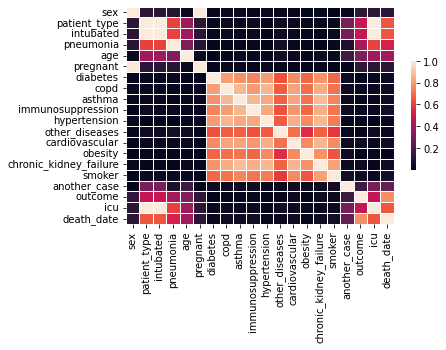

In [13]:
sns.heatmap(data.corr().abs(),annot=False,linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
#sns.heatmap(data.corr().abs(),annot=True)
x_train=data.drop(["death_date"],axis=1)
y_train=data["death_date"]
y_train=pd.DataFrame(y_train)
y_train

death_date
0              0
1              0
2              0
3              0
4              0
...          ...
5995           1
5996           1
5997           1
5998           1
5999           1

[6000 rows x 1 columns]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=1)
print ("Eğitim Veri Adet:" , x_train.shape[0])
print ("Eğitim Label Adet:" , y_train.shape[0])
print ("Test Veri Adet:" , x_test.shape[0])
print ("Test Label Adet:" , y_test.shape[0])

Eğitim Veri Adet: 4800
Eğitim Label Adet: 4800
Test Veri Adet: 1200
Test Label Adet: 1200


In [16]:
y_train=pd.DataFrame(y_train)
y_train

death_date
1352           0
2256           0
4495           1
5390           1
4945           1
...          ...
905            0
5192           1
3980           1
235            0
5157           1

[4800 rows x 1 columns]

In [17]:
y_train=y_train.astype('float')
y_test=y_test.astype('float')

# Machine Learning Algorithms

In [18]:
#Navie Bayes
nb=GaussianNB()
nb.fit(x_train, y_train)
score_1=nb.score(x_test,y_test)
#Decision Tree
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
score_2=decision_tree.score(x_test,y_test)
#Random Forest
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)
score_3=random_forest.score(x_test,y_test)
#SVM
sup_vec=SVC(random_state=3)
sup_vec.fit(x_train,y_train)
score_4=sup_vec.score(x_test,y_test)
#KNN
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
score_5=knn.score(x_test,y_test)
#Score
print ("Navie Bayes Acc Score:",score_1)
print ("Decision Tree Acc Score:",score_2)
print ("Random Forest Acc Score:",score_3)
print ("SVM Acc Score:",score_4)
print ("KNN Acc Score:",score_5)

Navie Bayes Acc Score: 0.8
Decision Tree Acc Score: 0.9083333333333333
Random Forest Acc Score: 0.935
SVM Acc Score: 0.8016666666666666
KNN Acc Score: 0.8783333333333333


In [19]:
y_pred = random_forest.predict(x_test)
y_pred_1 = nb.predict(x_test)
y_pred_2 = decision_tree.predict(x_test)
y_pred_3 = sup_vec.predict(x_test)
y_pred_4 = knn.predict(x_test)

# Confusion_matrix

[[577  31]
 [ 47 545]]


Text(0.5, 1.0, 'Confusion_matrix')

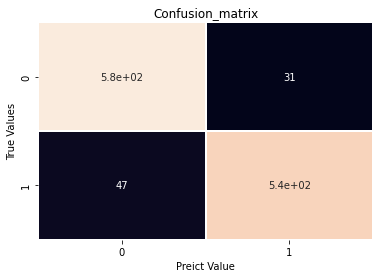

In [20]:
print (confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, lw=2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Preict Value")
plt.title("Confusion_matrix")

# Recall,Precision and F-1 Score


* Recall    =  TP / (TP + FN)
* Precision = TP / (TP + FP) 
* F-Measure = (2 * Precision * Recall) / (Precision + Recall)

In [21]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       608
         1.0       0.95      0.92      0.93       592

    accuracy                           0.94      1200
   macro avg       0.94      0.93      0.93      1200
weighted avg       0.94      0.94      0.93      1200



In [22]:
print ("F1 Score:", f1_score(y_test,y_pred))

F1 Score: 0.9332191780821918


# XGBoost

In [23]:
Classifier =XGBClassifier()
Classifier.fit(x_train, y_train)
y_predic=Classifier.predict(x_test)
cm=confusion_matrix(y_predic, y_test)
print (cm)

[12:45:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[581  52]
 [ 27 540]]


Text(0.5, 1.0, 'Confusion_matrix')

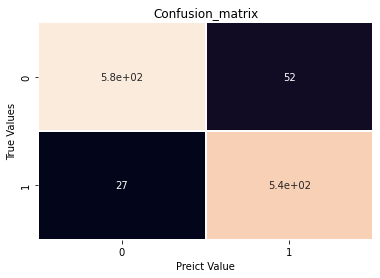

In [24]:
sns.heatmap(confusion_matrix(y_predic,y_test), annot=True,lw=2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Preict Value")
plt.title("Confusion_matrix")

In [25]:
probs=random_forest.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr, threshold =metrics.roc_curve(y_test, y_pred)
roc_auc=metrics.auc(fpr,tpr)
probs_1=nb.predict_proba(x_test)
preds_1=probs_1[:,1]
fpr_1,tpr_1, threshold_1 =metrics.roc_curve(y_test, y_pred_1)
roc_auc_1=metrics.auc(fpr_1,tpr_1)
probs_2=decision_tree.predict_proba(x_test)
preds_2=probs_2[:,1]
fpr_2,tpr_2, threshold_2 =metrics.roc_curve(y_test, y_pred_2)
roc_auc_2=metrics.auc(fpr_2,tpr_2)
#probs_3=sup_vec.predict_proba(x_test)
#preds_3=probs_3[:,1]
#fpr_3,tpr_3, threshold_3 =metrics.roc_curve(y_test, y_pred_3)
#roc_auc_3=metrics.auc(fpr_3,tpr_3)
probs_4=knn.predict_proba(x_test)
preds_4=probs_4[:,1]
fpr_4,tpr_4, threshold_4 =metrics.roc_curve(y_test, y_pred_4)
roc_auc_4=metrics.auc(fpr_4,tpr_4)

probs_5=Classifier.predict_proba(x_test)
preds_5=probs_5[:,1]
fpr_5,tpr_5, threshold_5 =metrics.roc_curve(y_test, y_predic)
roc_auc_5=metrics.auc(fpr_5,tpr_5)

In [26]:
score_6=Classifier.score(x_test,y_test)
print (score_6)

0.9341666666666667


# roc & auc

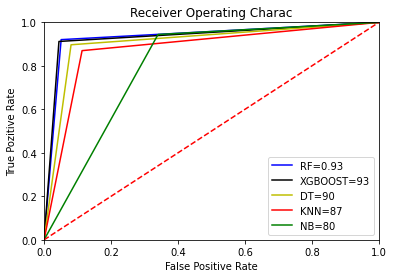

In [27]:
plt.title("Receiver Operating Charac")
plt.plot(fpr, tpr, 'b', label="RF=%0.2f" % roc_auc)
plt.plot(fpr_5, tpr_5, 'black', label="XGBOOST=93" % roc_auc)
plt.plot(fpr_2, tpr_2, 'y', label="DT=90" % roc_auc)
plt.plot(fpr_4, tpr_4, 'r', label="KNN=87" % roc_auc)
plt.plot(fpr_1, tpr_1, 'g', label="NB=80" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Pozitive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
f_data=data.drop(["diabetes","copd","asthma","immunosuppression","hypertension","other_diseases","cardiovascular","obesity","chronic_kidney_failure","smoker"],axis=1)

In [29]:
f_data.corr().abs()

sex  patient_type  intubated  pneumonia       age  \
sex           1.000000      0.116015   0.116637   0.105185  0.024742   
patient_type  0.116015      1.000000   0.999618   0.604858  0.391435   
intubated     0.116637      0.999618   1.000000   0.606346  0.391082   
pneumonia     0.105185      0.604858   0.606346   1.000000  0.317103   
age           0.024742      0.391435   0.391082   0.317103  1.000000   
pregnant      0.995783      0.116717   0.117351   0.104225  0.024200   
another_case  0.008403      0.303647   0.301973   0.071082  0.159564   
outcome       0.124977      0.482391   0.483642   0.413807  0.318322   
icu           0.116680      0.999621   0.999981   0.605929  0.391179   
death_date    0.111495      0.645723   0.646890   0.525338  0.401299   

              pregnant  another_case   outcome       icu  death_date  
sex           0.995783      0.008403  0.124977  0.116680    0.111495  
patient_type  0.116717      0.303647  0.482391  0.999621    0.645723  
intubated     0.117351      0.301973  0.483642  0.999981    0.646890  
pneumonia     0.104225      0.071082  0.413807  0.605929    0.525338  
age           0.024200      0.159564  0.318322  0.391179    0.401299  
pregnant      1.000000      0.007765  0.126439  0.117389    0.112296  
another_case  0.007765      1.000000  0.160476  0.302773    0.262967  
outcome       0.126439      0.160476  1.000000  0.483451    0.769429  
icu           0.117389      0.302773  0.483451  1.000000    0.646555  
death_date    0.112296      0.262967  0.769429  0.646555    1.000000

<AxesSubplot:>

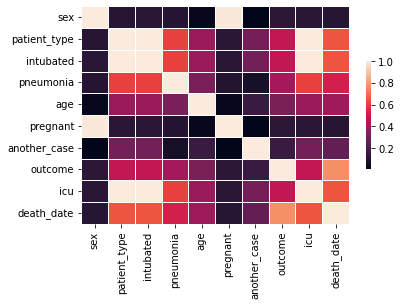

In [30]:
sns.heatmap(f_data.corr().abs(),annot=False,linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
xf_train=f_data.drop(["death_date"],axis=1)
yf_train=f_data["death_date"]
yf_train=pd.DataFrame(yf_train)
yf_train

death_date
0              0
1              0
2              0
3              0
4              0
...          ...
5995           1
5996           1
5997           1
5998           1
5999           1

[6000 rows x 1 columns]

In [32]:
xf_train,xf_test,yf_train,yf_test=train_test_split(xf_train,yf_train,test_size=0.1,random_state=1)
print ("Eğitim Veri Adet:" , xf_train.shape[0])
print ("Eğitim Label Adet:" , yf_train.shape[0])
print ("Test Veri Adet:" , xf_test.shape[0])
print ("Test Label Adet:" , yf_test.shape[0])

Eğitim Veri Adet: 5400
Eğitim Label Adet: 5400
Test Veri Adet: 600
Test Label Adet: 600


In [33]:
print ("Eğitim Veri Adet:" , xf_train.shape[0])
print ("Eğitim Label Adet:" , yf_train.shape[0])
print ("Test Veri Adet:" , xf_test.shape[0])
print ("Test Label Adet:" , yf_test.shape[0])
y_train=y_train.astype('float')
y_test=y_test.astype('float')
#Navie Bayes
nb.fit(xf_train, yf_train)
score_10=nb.score(xf_test,yf_test)
#Decision Tree
decision_tree.fit(xf_train, yf_train)
score_11=decision_tree.score(xf_test,yf_test)
#Random Forest
random_forest.fit(xf_train,yf_train)
score_12=random_forest.score(xf_test,yf_test)
#SVM
sup_vec.fit(xf_train,yf_train)
score_13=sup_vec.score(xf_test,yf_test)
#KNN
knn.fit(xf_train,yf_train)
score_14=knn.score(xf_test,yf_test)
print ("Navie Bayes Acc Score:",score_10)
print ("Decision Tree Acc Score:",score_11)
print ("Random Forest Acc Score:",score_12)
print ("SVM Acc Score:",score_13)
print ("KNN Acc Score:",score_14)
yf_pred11 = random_forest.predict(xf_test)
yf_pred12 = nb.predict(xf_test)
yf_pred13 = decision_tree.predict(xf_test)
yf_pred14 = sup_vec.predict(xf_test)
yf_pred15 = knn.predict(xf_test)

Eğitim Veri Adet: 5400
Eğitim Label Adet: 5400
Test Veri Adet: 600
Test Label Adet: 600
Navie Bayes Acc Score: 0.8266666666666667
Decision Tree Acc Score: 0.9066666666666666
Random Forest Acc Score: 0.9266666666666666
SVM Acc Score: 0.7916666666666666
KNN Acc Score: 0.8966666666666666


[[287  22]
 [ 22 269]]


Text(0.5, 1.0, 'Confusion_matrix')

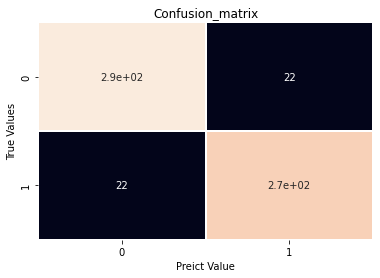

In [34]:
print (confusion_matrix(yf_test, yf_pred11))
sns.heatmap(confusion_matrix(yf_pred11,yf_test), annot=True,lw=2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Preict Value")
plt.title("Confusion_matrix")

In [35]:
print (classification_report(yf_test,yf_pred11))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       309
           1       0.92      0.92      0.92       291

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



In [36]:
Classifier.fit(xf_train, yf_train)
y_predic11=Classifier.predict(xf_test)
cm1=confusion_matrix(y_predic11, yf_test)
print (cm1)

[12:45:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[290  21]
 [ 19 270]]


In [37]:
y_predic11.shape

(600,)

In [38]:
print ("F1 Score:", f1_score(yf_test,y_predic11))

F1 Score: 0.9310344827586208


In [39]:
Classifier.fit(xf_train, yf_train)
y_predic11=Classifier.predict(xf_test)

[12:45:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [40]:
score_777=Classifier.score(xf_test,yf_test)
print (score_777)

0.9333333333333333


In [41]:
probs22=random_forest.predict_proba(xf_test)
preds22=probs22[:,1]
fpr22,tpr22, threshold =metrics.roc_curve(yf_test, yf_pred11)
roc_auc22=metrics.auc(fpr22,tpr22)

probs23=nb.predict_proba(xf_test)
preds23=probs23[:,1]
fpr23,tpr23, threshold23 =metrics.roc_curve(yf_test, yf_pred12)
roc_auc23=metrics.auc(fpr23,tpr23)

probs24=decision_tree.predict_proba(xf_test)
preds24=probs24[:,1]
fpr24,tpr24, threshold24 =metrics.roc_curve(yf_test, yf_pred13)
roc_auc24=metrics.auc(fpr24,tpr24)

#probs_3=sup_vec.predict_proba(x_test)
#preds_3=probs_3[:,1]
#fpr_3,tpr_3, threshold_3 =metrics.roc_curve(y_test, y_pred_3)
#roc_auc_3=metrics.auc(fpr_3,tpr_3)

probs25=knn.predict_proba(xf_test)
preds25=probs25[:,1]
fpr25,tpr25, threshold25 =metrics.roc_curve(yf_test, yf_pred15)
roc_auc25=metrics.auc(fpr25,tpr25)

probs_99=Classifier.predict_proba(xf_test)
preds_99=probs_99[:,1]
fpr_99,tpr_99, threshold_99 =metrics.roc_curve(yf_test, y_predic11)
roc_auc_99=metrics.auc(fpr_99,tpr_99)

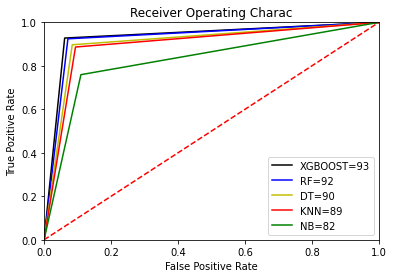

In [42]:
plt.title("Receiver Operating Charac")
plt.plot(fpr_99, tpr_99, 'black', label="XGBOOST=93" % roc_auc)
plt.plot(fpr22, tpr22, 'b', label="RF=92" % roc_auc)
plt.plot(fpr24, tpr24, 'y', label="DT=90" % roc_auc)
plt.plot(fpr25, tpr25, 'r', label="KNN=89" % roc_auc)
plt.plot(fpr23, tpr23, 'g', label="NB=82" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Pozitive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Ensemble

In [43]:
volting=VotingClassifier(estimators=[("rf",random_forest),("gbboost",Classifier),("dt",decision_tree)], voting="hard").fit(xf_train, yf_train)

[12:45:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [44]:
score7842=volting.score(xf_test, yf_test)

In [45]:
score7842

0.9216666666666666

In [46]:
volting2=VotingClassifier(estimators=[("rf",random_forest),("gbboost",Classifier),("dt",decision_tree)], voting="soft").fit(xf_train, yf_train)

[12:45:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [47]:
score78=volting2.score(xf_test, yf_test)

In [48]:
score78

0.915

In [49]:
volting12=VotingClassifier(estimators=[("rf",random_forest),("gbboost",Classifier),("dt",decision_tree)], voting="hard").fit(x_train, y_train)

[12:45:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [50]:
score123123=volting12.score(x_test, y_test)

In [51]:
score123123

0.9333333333333333

In [52]:
bag=BaggingClassifier(decision_tree, n_estimators=100, max_samples=0.8,n_jobs=-1, random_state=1).fit(xf_train, yf_train)

In [53]:
bag.score(xf_test, yf_test)

0.925

In [54]:
randomForestObject = RandomForestClassifier(n_estimators=10)
randomForestObject.fit(xf_train, yf_train)

RandomForestClassifier(n_estimators=10)

In [55]:
df_test_sonuc = randomForestObject.score(xf_test, yf_test)
print("Random Forest Doğruluk (test_seti): ",round(df_test_sonuc,2))

Random Forest Doğruluk (test_seti):  0.92


# New Ensemble

In [56]:
yf_pred11

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,

In [57]:
extra_data=pd.DataFrame(yf_pred11)
extra_data1=pd.DataFrame(yf_pred12)
extra_data2=pd.DataFrame(yf_pred13)
extra_data3=pd.DataFrame(yf_pred14)
extra_data4=pd.DataFrame(yf_pred15)
extra_data5=pd.DataFrame(y_predic11)



In [58]:
df_new  = extra_data.rename(columns={0: 'deat_date'})
df_new1 = extra_data.rename(columns={0: 'deat_date'})
df_new2 = extra_data.rename(columns={0: 'deat_date'})
df_new3 = extra_data.rename(columns={0: 'deat_date'})
df_new4 = extra_data.rename(columns={0: 'deat_date'})
df_new5 = extra_data.rename(columns={0: 'deat_date'})

In [59]:
df_new=df_new.astype('int')
df_new1=df_new1.astype('int')
df_new2=df_new2.astype('int')
df_new3=df_new3.astype('int')
df_new4=df_new4.astype('int')
df_new5=df_new5.astype('int')



In [60]:
data_sets=pd.concat([df_new,df_new1,df_new2,df_new3,df_new4,df_new5], ignore_index=True, axis=1)

In [61]:
data_sets

0  1  2  3  4  5
0    0  0  0  0  0  0
1    0  0  0  0  0  0
2    0  0  0  0  0  0
3    1  1  1  1  1  1
4    1  1  1  1  1  1
..  .. .. .. .. .. ..
595  1  1  1  1  1  1
596  0  0  0  0  0  0
597  0  0  0  0  0  0
598  0  0  0  0  0  0
599  0  0  0  0  0  0

[600 rows x 6 columns]

In [62]:
yf_test.shape

(600, 1)

In [63]:
yf_test=pd.concat([yf_test], ignore_index=True)

In [64]:
x_new_train=data_sets.head(520)
y_new_train=yf_test.head(520)
x_new_test=data_sets.tail(80)
y_new_test=yf_test.tail(80)

In [65]:
Classifier.fit(x_new_train, y_new_train)

[12:46:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
y_pred_new=Classifier.predict(x_new_test)

In [67]:
score_new_pred=Classifier.score(x_new_test,y_new_test)

In [68]:
score_new_pred

0.9375

In [69]:
y_pred_new


array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [70]:
y_pred_new_df=pd.DataFrame(y_pred_new)

In [71]:
fff=yf_test.tail(80)

In [72]:
y_pred_new=pd.DataFrame(y_pred_new)

In [73]:
fff

death_date
520           0
521           0
522           1
523           0
524           1
..          ...
595           1
596           0
597           0
598           0
599           1

[80 rows x 1 columns]

In [74]:
fff=pd.concat([fff],ignore_index=True)

In [75]:
fff=fff.astype('int')
y_pred_new=y_pred_new.astype('int')


In [76]:
final=pd.concat([y_pred_new,fff], ignore_index=True,axis=1)

In [77]:
fff


death_date
0            0
1            0
2            1
3            0
4            1
..         ...
75           1
76           0
77           0
78           0
79           1

[80 rows x 1 columns]

In [78]:
final.shape

(80, 2)

In [79]:
final

0  1
0   0  0
1   0  0
2   1  1
3   0  0
4   1  1
.. .. ..
75  1  1
76  0  0
77  0  0
78  0  0
79  0  1

[80 rows x 2 columns]